# Calculating Metrics to Evaluate VS performance

This notebook applies the different metrics reviewed in the previous notebook to the VS scoring results and predictions given by different docking tools.

In [1]:
import pandas as pd
import numpy as np
import glob, os, sys
sys.path.append(r'..')

In [2]:
from modules.plotting_metrics import PlotMetric

## Loading Docking Results
> ### Docking Score & Ligand Efficiency
First, we have to load the docking results, which were directly obtained from the docking tools. Then, we  also load the *Ligand Efficiency Scores*, which were calculated in a previous notebook and correspond to the quotient between *docking score* and the *number of heavy atoms* of each ligand.

Therefore, we load the data:

In [3]:
# CSAR DockingScores
docking_tools_csar = ['AD4_LE', 'AD4_LC', 'VINA', 'VINARDO']
csar_dk_Scores = {dk_tool: pd.read_csv(F'../data/vs_docking_crys_ensemble_{dk_tool}.csv', index_col=0)
                 for dk_tool in docking_tools_csar}
# CSAR Ligand Efficiency
csar_ligEff_Scores = {dk_tool: pd.read_csv(
    F'../data/docking_scores/vs_dk_CRYS_402_CSAR_{dk_tool}_ligand_Efficiency.csv', index_col=0)
                 for dk_tool in docking_tools_csar}
# TRUE CSAR VALUES
y_true_csar = np.array(csar_dk_Scores['VINA'].ActiveInactive == "Active", dtype=int)
# PDB_IDS
pdb_ids = csar_dk_Scores['VINA'].columns

Then we calculate the available metrics to evaluate the VS performance of the following:

For CSAR:
1. **We have 402 CDK2 protein conformations**

- **We have 4 docking tools/methods**:
    - *AD4 LC*
    - *AD4 LE*
    - *VINA*
    - *VINARDO*
    
- **We have two different _ranking features_**:
    - *Docking Score*: The scores directly obtained from the each of the docking tools.
    - *Ligand Efficiency*: The quotient between *docking score* and the *number of heavy atoms* of each ligand.
    
- **We evaluate four different metrics**:
    - *ROC-AUC*
    - *BEDROC (alpha = 4)*
    - *Precision and Recall AUC*
    - *Normalized Enrichment Factor AUC*

***

## Evaluation of VS CSAR performance

In [16]:
# CSAR metrics results
metrics = {'ROC': 'roc_auc', 'PrcRll': 'pr_auc', 'NEF': 'ref_auc', 'BEDROC': 'bedroc'}
column_to_drop = 'ActiveInactive'
ranking_scores_dfs = {'DkS': csar_dk_Scores, 'DkLEff': csar_ligEff_Scores}

bedroc_alpha = 4

results_dic = {}

for ranking_score in ranking_scores_dfs.keys():
    for metric in metrics.keys():
        for dk_tool in docking_tools_csar:
            rks = ranking_scores_dfs[ranking_score]
            y_preds_dic = rks[dk_tool].drop([column_to_drop], axis = 1).to_dict('list')
            scores = PlotMetric(y_true = y_true_csar, y_pred_dict = y_preds_dic)
            
            # Now we get the name of the column
            col_name = F'{dk_tool}-{ranking_score}-{metric}'
            metric_to_use = metrics[metric]
            if metric_to_use == 'bedroc':
                metric_values = scores.format_metric_results(metric_to_use, 
                                                alpha = bedroc_alpha).iloc[:,0].values
            else:
                metric_values = scores.format_metric_results(metric_to_use).iloc[:,0].values
            results_dic[col_name] = metric_values
    
csar_dk_402confs_vs_metrics = pd.DataFrame(results_dic)

In [17]:
csar_dk_402confs_vs_metrics.shape

(402, 32)

As a result we got  a new DataFrame of 402 rows and 32 columns (4 dk tools *times* 2 ranking features *times* 4 evaluation metrics).

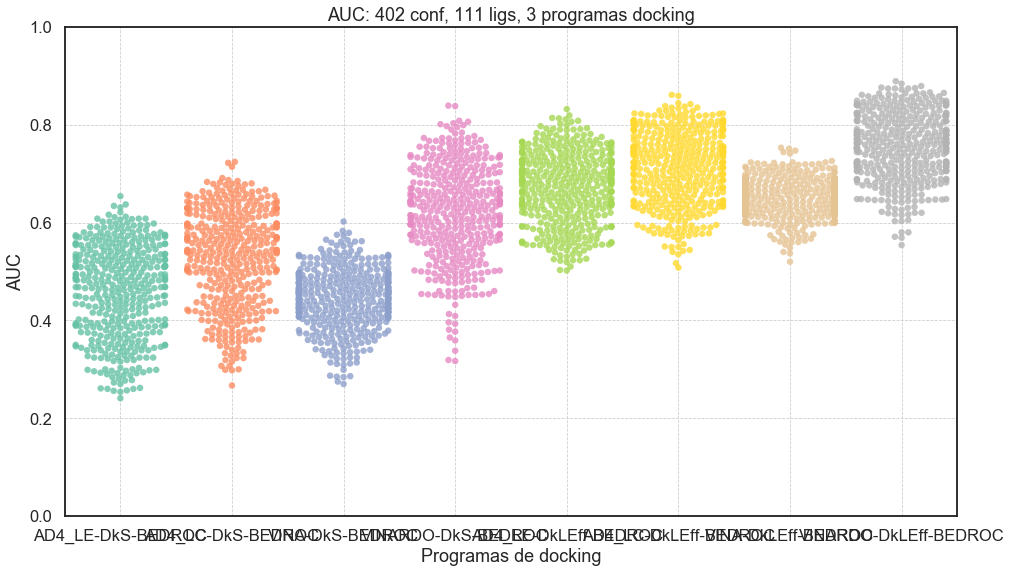

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots()

data = prueba.filter(regex='BEDROC', axis = 1)
data = data.melt()
#data['Conf Labels'] = np.tile(df_cdk2_labels.Labels_conf, 6)

fig.set_size_inches(16, 9)
sns.swarmplot(x = "variable", y = "value", data= data, ax = axes, alpha=0.8, 
               palette=  'Set2', s = 6.5)
axes.set_title('AUC: 402 conf, 111 ligs, 3 programas docking')
axes.grid(linestyle='--', linewidth='0.8')
plt.xlabel("Programas de docking")
plt.ylabel("AUC")
plt.ylim(0, 1)
plt.show()


In [7]:
csar_dkScores_confs = csar_dk_Scores['VINA'].drop(['ActiveInactive'], axis = 1).to_dict('list')

In [8]:
csar_dkScores_vina = PlotMetric(y_true = y_true_csar, y_pred_dict = csar_dkScores_confs)
csar_dkScores_vina

In [9]:
csar_dkScores_vina.format_metric_results().iloc[:,0].values

array([0.575, 0.546, 0.581, 0.535, 0.571, 0.607, 0.626, 0.621, 0.548,
       0.577, 0.435, 0.533, 0.467, 0.514, 0.596, 0.533, 0.582, 0.575,
       0.583, 0.426, 0.505, 0.476, 0.573, 0.578, 0.589, 0.507, 0.518,
       0.562, 0.488, 0.55 , 0.535, 0.61 , 0.548, 0.551, 0.436, 0.514,
       0.544, 0.467, 0.522, 0.582, 0.527, 0.519, 0.552, 0.525, 0.568,
       0.63 , 0.643, 0.548, 0.715, 0.482, 0.498, 0.505, 0.522, 0.526,
       0.544, 0.637, 0.54 , 0.643, 0.481, 0.657, 0.591, 0.522, 0.467,
       0.53 , 0.529, 0.581, 0.609, 0.555, 0.473, 0.578, 0.534, 0.45 ,
       0.626, 0.589, 0.61 , 0.608, 0.613, 0.561, 0.566, 0.456, 0.563,
       0.543, 0.606, 0.518, 0.529, 0.541, 0.504, 0.595, 0.526, 0.54 ,
       0.527, 0.577, 0.52 , 0.509, 0.549, 0.561, 0.509, 0.62 , 0.549,
       0.549, 0.558, 0.587, 0.556, 0.631, 0.609, 0.619, 0.587, 0.607,
       0.66 , 0.591, 0.551, 0.519, 0.563, 0.481, 0.57 , 0.463, 0.6  ,
       0.424, 0.527, 0.608, 0.542, 0.6  , 0.612, 0.565, 0.53 , 0.492,
       0.623, 0.544,

In [10]:
for pdb_id in pdb_ids:
    csar_dkScores['VINA'][pdb_id]

NameError: name 'csar_dkScores' is not defined

In [ ]:
pdb_ids = csar_dkScores['VINA'].drop(['ActiveInactive'], axis = 1).columns

#for pdb_id in pdb_ids:

In [ ]:
l = [1, 2, 3]
np.array(np.array(l)) == np.array(l)

In [ ]:
# Generamos los tres casos de CSAR
from truchon_2006_3_ranking_cases import get_three_ranking_cases
# Creamos el arreglo de valores verdaderos:
y_true_csar = np.array([1 if i < 10 else 0 for i in range(100)])
csar_cases_preds = get_three_ranking_cases(y_true_csar, include_optimal = True)
csar_cases = PlotMetric(y_true = y_true_csar, y_pred_dict = csar_cases_preds)
#csar_cases.plot_actives_distribution()

In [ ]:
csar_cases.format_metric_results('ref_auc')

In [ ]:
roc_auc, pr_auc, 

In [15]:
%%html
<link rel="stylesheet" href="https://unpkg.com/treeflex/dist/css/treeflex.css">

<style>
  /* make the nodes round and change their background-color */

  .tf-custom .tf-nc {
    height: 1em; width: 1em;
    background-color: dodgerblue;
    border-color: dodgerblue;
    padding: 0;
    border-radius: 50%;
  }

  /* make the horizontal and vertical connectors thick and change their color */

  .tf-custom .tf-nc:before,
  .tf-custom .tf-nc:after {
    border-left-color: dodgerblue;
    border-left-width: 2px;
  }

  .tf-custom li li:before {
    border-top-color: dodgerblue;
    border-top-width: 2px;
  }
</style>